#Libraries, Directory, and Data

In [14]:
%cd /content/drive/MyDrive/Analytics Projects

/content/drive/MyDrive/Analytics Projects


In [15]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#import data
food = pd.read_csv('u_food_marketing.csv')
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


**Column Names**
* **AcceptedCmp1 - 5:** 1 if customer accepted the offer in the campaign, 0 otherwise
* **Response (target):** 1 if customer accepted the offer in the last campaign, 0 otherwise
* **Complain:** 1 if customer complained in the last 2 years
*  **DtCustomer:** date of customer's enrollment with the company
* **Education:** customer's level of education
* **Marital:** customer's marital status
* **Kidhome:** number of small children in customer's household
* **Teenhome:** number of teenagers in customer's household
* **Income:** customer's yearly household income
* **MntProducts:** amount spent on products in the last 2 years
* **NumDealsPurchases:** number of purchases made with discount
* **NumCatalogPurchases:** number of purchases made using catalogue
* **NumStorePurchases:** number of purchases made directly in stores
* **NumWebPurchases:** number of purchases made through company's web site
* **NumWebVisitsMonth:** number of visits to company's web site in the last month
* **Recency:** number of days since the last purchase

In [28]:
pd.set_option('display.max.rows', 2300)
pd.set_option('display.max.columns', 50)

#Data Cleaning

In [18]:
food.drop_duplicates(keep = False, inplace = True)

In [19]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [31]:
#Create one column for the total amount of children in a household by finding the sum of kidhome and teenhome column
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis=1)

In [21]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [22]:
food.keys()

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Total_Children'],
      dtype='object')

In [23]:
#Combine marital status into one column
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [26]:
#Add all marital statuses into one column
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)

In [27]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [30]:
#Assign string to each value within the marital status
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [32]:
#Combine education levels into one column
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [33]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

In [34]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [35]:
food['Accepted_Campaigns'] = food[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [38]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1
30,40548.0,0,1,31,110,0,5,2,0,3,2,2,1,4,5,0,1,0,0,0,0,3,11,0,50,2786,0,0,0,2,0,0,0,3,0,0,117,114,1,1,2,Together,3,1
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,3,0,0,1376,1135,2,0,5,Divorced,3,1


In [37]:
#If it's not 0 we want to convert it to a boolean value
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

#Data Analytics

In [44]:
food.select_dtypes('number').corr(method = 'pearson')['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.859712
AcceptedCmp4            0.561592
AcceptedCmp3            0.546838
AcceptedCmp5            0.531799
AcceptedCmp1            0.514231
MntWines                0.461281
MntTotal                0.408568
MntRegularProds         0.408493
Response                0.360220
Income                  0.328398
NumCatalogPurchases     0.320972
MntMeatProducts         0.273522
NumWebPurchases         0.217850
AcceptedCmp2            0.210447
NumStorePurchases       0.194347
MntGoldProds            0.173950
MntSweetProducts        0.146843
MntFishProducts         0.142262
MntFruits               0.136188
Education_Status        0.039102
education_PhD           0.028309
marital_Widow           0.016490
marital_Single          0.010632
Age                     0.005825
education_Graduation    0.003683
marital_Married         0.001860
education_Master        0.000718
marital_Together       -0.005107
Customer_Days          -0.009468
Marital_St

<Axes: >

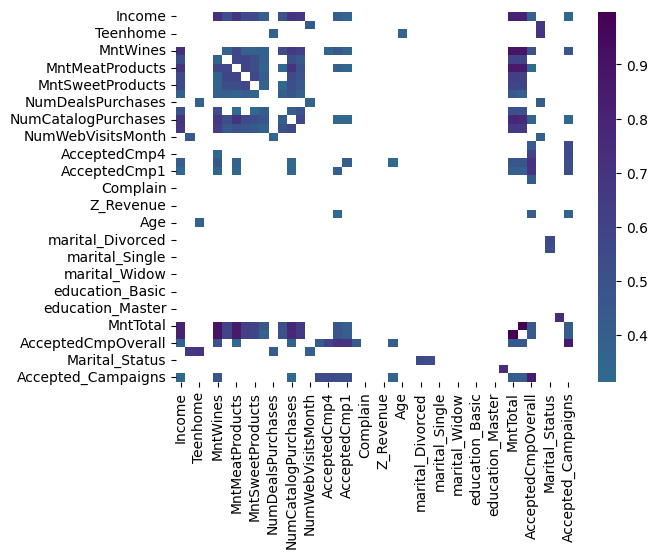

In [97]:
all_correlations = food.select_dtypes('number').corr(method = 'pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
sns.heatmap(all_correlations,
            center = 0,
            cmap = 'viridis_r')

In [61]:
all_correlations['Accepted_Campaigns']

Income                  0.328398
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.461281
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.320972
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.546838
AcceptedCmp4            0.561592
AcceptedCmp5            0.531799
AcceptedCmp1            0.514231
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.360220
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [68]:
#Create seperate groups for each age range for future correlations and data analysis
age_groups = [(23,30), (31,40), (41,50), (51,60), (61, 70), (71,85)]

def assign_age_group(Age):
  for age_range in age_groups:
    if age_range[0] <= Age <= age_range[1]:
      return f'{age_range[0]} - {age_range[1]}'
  return('Unknown')

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [67]:
food[['Age', 'Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

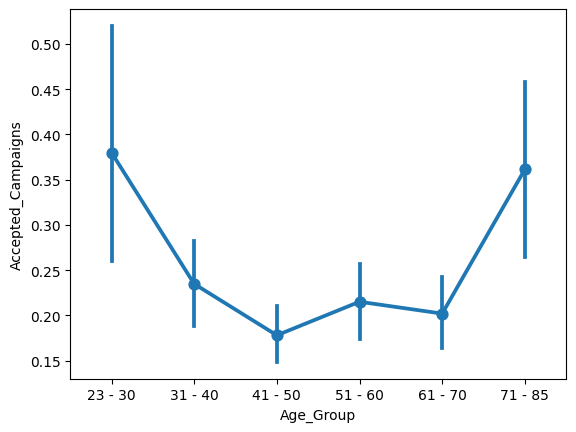

In [96]:
#Looking at the correlation between accepted campaigns versus age range
#Ordering the ages in the correct order
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70', '71 - 85']

sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [74]:
#How many people have accepted a campaign per age group
counts = food['Age_Group'].value_counts()

In [77]:
#Calculate the percentage of people that have accepted a campaign by age group
percentage = counts / food.shape[0]

In [80]:
percent_food = percentage.reset_index()

In [84]:
percent_food.columns = ['age_group', 'percentage']
percent_food = percent_food.sort_values('age_group')
percent_food

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


<ipython-input-93-030c6ad4f0a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'age_group', y = 'percentage', data = percent_food, palette = 'viridis')


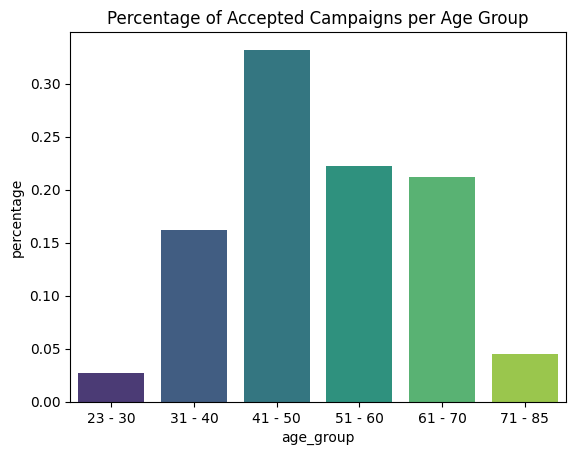

In [93]:
sns.barplot(x = 'age_group', y = 'percentage', data = percent_food, palette = 'viridis')
plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

Age Segmentation - Core audience for accepting campaigns right now is 31-70. 23-30, 71 and up accept at higher rates.

<ipython-input-101-bd4e38f2d171>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food, palette = 'viridis')


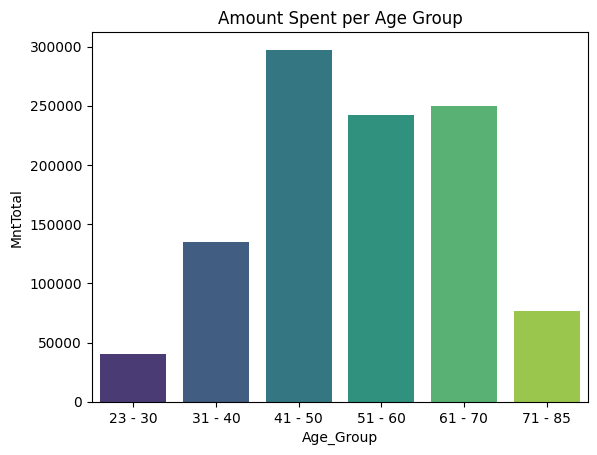

In [101]:
#Find the amount spent by age group
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food, palette = 'viridis')
plt.title('Amount Spent per Age Group')
plt.show()

<ipython-input-102-2fb9ff1535a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food, palette = 'viridis')


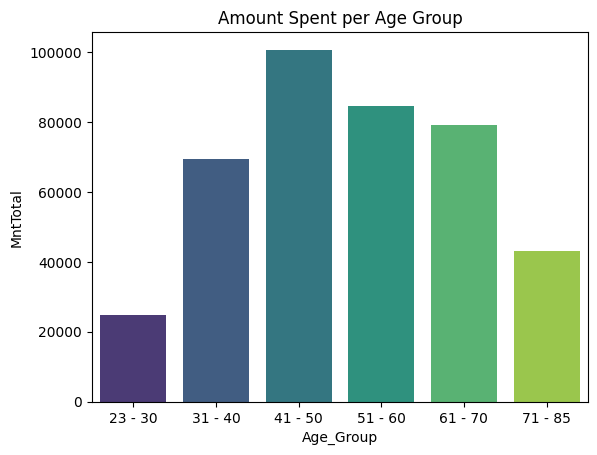

In [102]:
#Find the amount spent for customers who did accept a campaign
acct_camp = food[food['Accepted_Campaigns'] != 0]
grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food, palette = 'viridis')
plt.title('Amount Spent per Age Group')
plt.show()

In [105]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])

In [106]:
sum_food = sum_food.reset_index()

In [109]:
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<ipython-input-112-c478f8dd455d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_food, palette = 'viridis')


<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

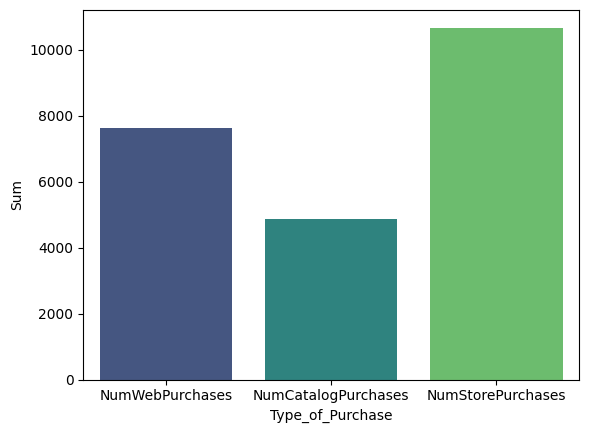

In [112]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_food, palette = 'viridis')

<ipython-input-115-25439684e968>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_food, palette = 'viridis')


<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

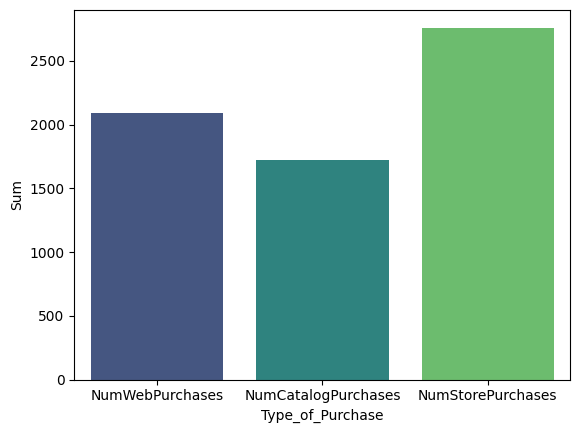

In [115]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_food, palette = 'viridis')

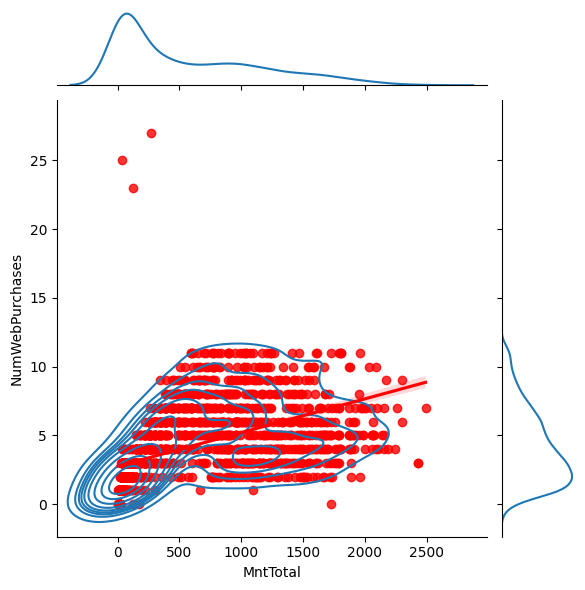

In [119]:
#Analyzing the correlation between number of web purchases and total amount spent
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

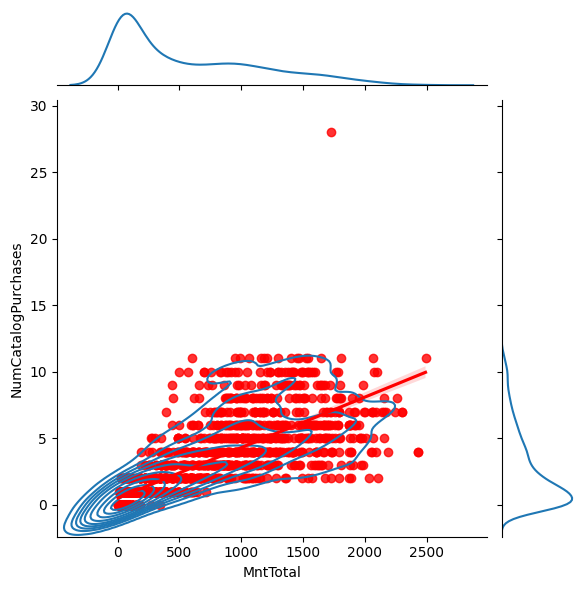

In [120]:
#Analyzing the correlation between number of catalog purchases and total amount spent
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

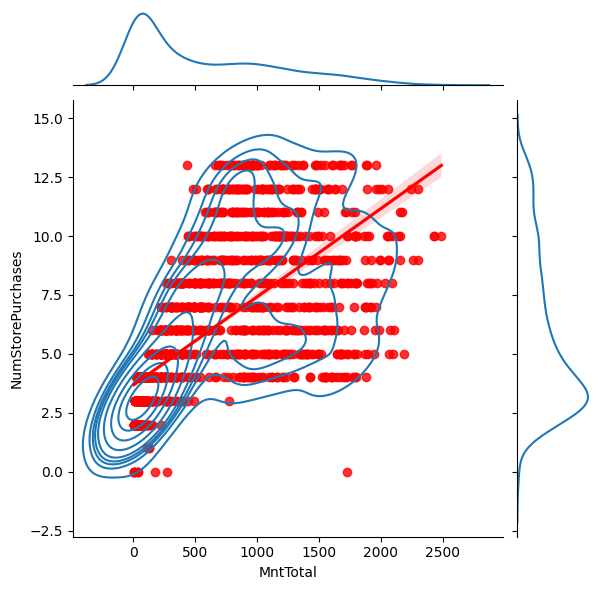

In [121]:
#Analyzing the correlation between number of store purchases and total amount spent
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

2 Directions: Boost up the higher percentage catalog cutomers. Or focus on In Store/Web because they have more traffic.

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

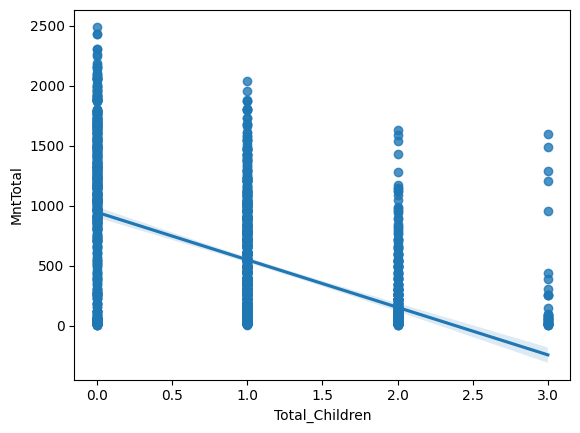

In [122]:
#Analyze the correlation between amount of children and total amount spent
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

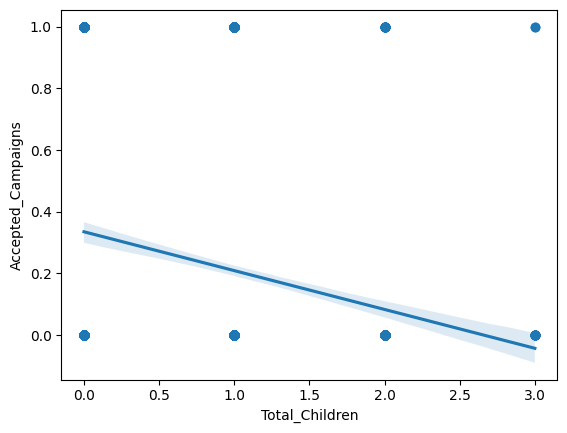

In [123]:
#Correlation between amount of children versus accepted campaigns
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

Less children means customers are more likely to accept a campaign.

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

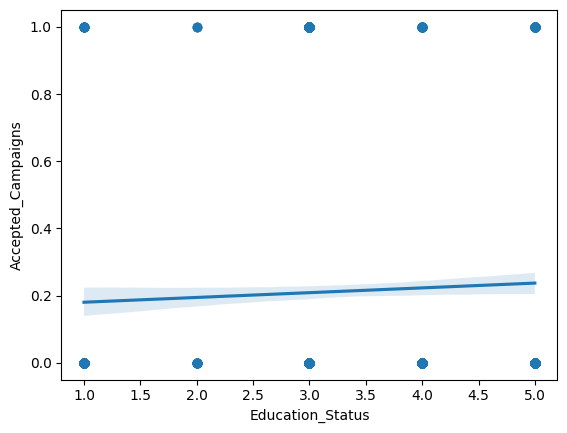

In [124]:
#Correlation between education level versus accepted campaigns
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

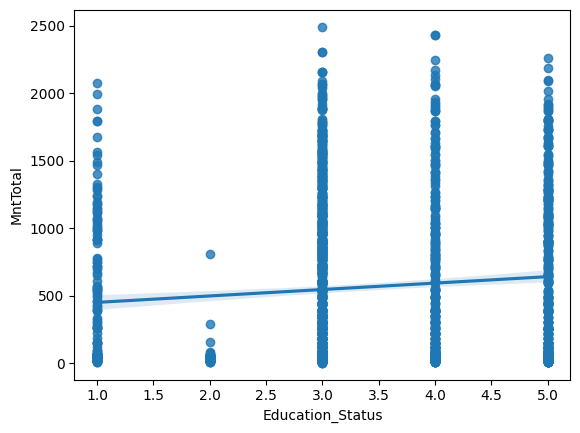

In [125]:
#Correlation between education level versus total amount spent
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)

Education isn't really significant in our segmentation.

<ipython-input-128-c433925db0ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Marital_Status_str', data = food, palette = "icefire")


<Axes: xlabel='Marital_Status_str', ylabel='count'>

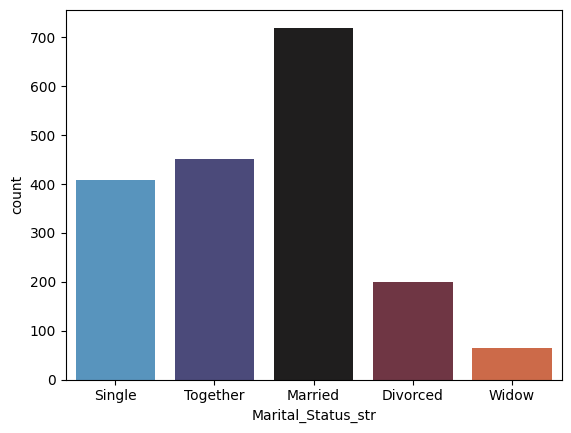

In [128]:
sns.countplot(x = 'Marital_Status_str', data = food, palette = "icefire")

In [136]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

<ipython-input-138-4d538bb40ded>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food, palette = "icefire")


<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

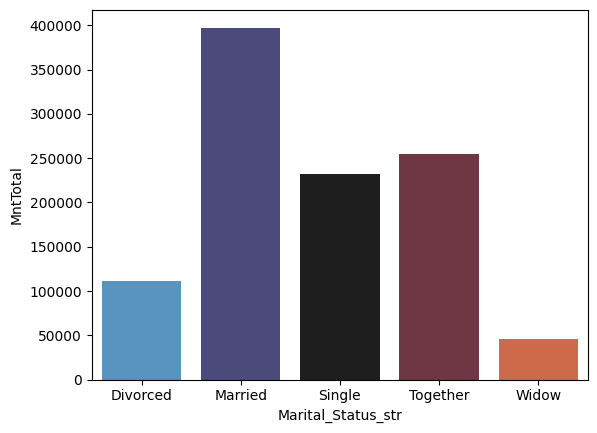

In [138]:
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food, palette = "icefire")

In [143]:
#Calculate percentage of each marital status that accepted campaigns
total = food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()
pect_marital = accepted / total * 100

In [145]:
pect_food = pect_marital.reset_index()
pect_food.columns = ['Marital_Status', 'Percentage']

<ipython-input-148-87f9aa740a22>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Marital_Status', y = 'Percentage', data = pect_food, palette = "icefire")


<Axes: xlabel='Marital_Status', ylabel='Percentage'>

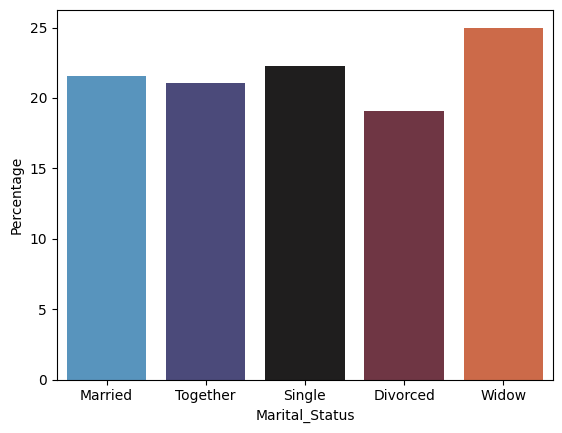

In [148]:
sns.barplot(x = 'Marital_Status', y = 'Percentage', data = pect_food, palette = "icefire")

Marriage - Married, single, together are spending a lot more money than widow and divorced. We should focus on this segment.

**OVERALL FINDINGS**
1. **Age:** 30-70 were spending more money, but less likely to accept campaigns. Higher volume here though.
2. **Purchase location:** Catalog was more likely to accept campaigns, but in person spends more. Recommend a split between all.
40% catalog, 30% store, 30% web
3. **Children:** Focus on people with no kids (or less kids).
4. **Education:** No impact - don't target
5. **Marital Status:** No large impact, Married, Single, Together, spend more money.

**Revenue Increase Recommendations**
1. Focus on middle aged people, higher earners, with no kids. Target on different platforms with split above.

**New Users to Increase Sales**
2. Focus on 21-30 year olds, and 70 and up, who specifically accepted campaigns at a higher rate.